[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/maxi-tb22/SFM/blob/main/00_code/SFM.ipynb)


<h1 align="center"><strong><font size="6"> The Soccer-Factor-Model <br> Identifying a Soccer-Player's Skill/Ability via Bayesian Logistic Regression </h1></strong></font>

<br>

Actually, it's football, the *jogo bonito* that you play with your feet. But oddly, Americans call it *soccer*.


I'm a former passionate -- but moderately skilled -- player myself, having played for about 20 years for the club in the tiny Bavarian village I grew up in.
Forever, I have been wondering whether the GOATs of my childhood and present are as good as they are because of their **skill** and **abilities** (whether due to favorable genes or insane discipline and desire to become the best version of themselves) or because of their team mates doing the dirty work.

Recently I got fascinated by Python and Bayesian statistics. Wanting to learn more about these topics, I thought about a little side project, in which I can apply Bayesian stats to find an answer to some sort of *research-ish* question. 
However, the project should be fun and have some real-world application that some people may have an interest in.

<br>

Stumbling across **soccer analytics**, there came the idea for this tiny application: 

 **Can Python and Bayesian statistics (all combined by [#PyMC](https://www.pymc.io/welcome.html)) help me answer the mysteries of my childhood?**


 <br>

----

## **So, what's the Soccer-Factor-Model all about?**

The Soccer-Factor-Model (SFM) is inspired by the Asset-Pricing literature along the following lines:

> 1. Factor Models à la [Fama & French](https://onlinelibrary.wiley.com/doi/full/10.1111/j.1540-6261.1992.tb04398.x) use "factors" to explain the cross-section of stock returns. <br>
 --> **here**: we use "Team-Factors" to explain away the role of the team's strength in making a given player $i$ score a goal.

> 2. There is some literature on the skill of investment fund managers that works in a similar way: "explain away" that proportation of a Fund's returns that is related to economic fundamentals. <br>
 --> The "remainder"/"residual"/"unexplained part" of the return is attributed to the fund manager's skill/ability.


<br>

Our "dependent variable"/"label"/"outcome variable" ($y_{i,m}$) will be a binary indicator, telling us whether player $i$ has scored a goal in season $s$ in match $m$ -- or not:

\begin{align}
        y_{i,s,m} = \left\{
        \begin{array}{cl}
        0 & \textbf{not} \text{ scored} \\
        1 & \text{scored}
        \end{array}
        \right.
\end{align}




(Yes, a multiclass extension predicting the *number* of goals would be awesome, but let's keep our feet on the ground for now.)


The SFM is then set-up as follows:

<br>

\begin{align}
     p_{i,s,m} \equiv   P\left(y_{i,s,m} = 1 | \mathbf{x}_{i,s,m-1}, \alpha_i, \beta \right) = \sigma \left(\alpha_{i} + \mathbf{x}_{i,s,m-1} \, \mathbf{\beta} \right) \qquad \left( M.1 \right)
\end{align}

<br>

where

> - $p_{i,s,m}$: &ensp;&ensp;&emsp; The probability of player $i$ scoring a goal in season $s$ in match $m$ *conditional* on $\mathbf{x}_{i,s,m-1}$, $\alpha_i$, and $\beta \;$ ;

> - $\mathbf{x}_{i,s,m-1}$: &emsp; A $\; 1 \times N$ vector of *factors* that are intended to resemble the imbalance between player $i$'s team and the <br> &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; opponent-team. The subscript $m-1$ signals that these *factors* only contain information about the teams' <br> &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; differences that prevails **before** the the referee blows the whistle to start off match $m$ ! <br> &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; Again, to be clear, these *factors* are intended to explain that fraction of $p_{i,s,m}$ that is due to the difference in the <br> &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; strength  of player $i$'s team and the opponent-team;

> - $\beta$: &ensp;&ensp;&ensp;&ensp;&ensp;&emsp; The sensitivity of $p_{i,s,m}$ to the factors $\mathbf{x}_{i,s,m} \;$ ;

> - $\alpha_i$: &ensp;&ensp;&ensp;&ensp;&ensp; Our main parameter of interest as it captures that fraction of $p_{i,s,m}$ that is attributed toplayer $i$'s skill/ability only! <br> &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; (Yes, later on, this parameter will carry a subscript $s$, $\alpha_{i,s} \;$, allowing a player's skill/ability to vary across seasons); 

> - $\sigma \left(\cdot\right)$: &ensp;&ensp;&emsp; The $\mathtt{sigmoid}$ function, which transforms the predictions of the linear model $\alpha_i + \mathbf{X}_i \, \mathbf{\beta}$ into a number that <br> &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; ranges between zero and one, such that $p_{i,s,m} \in \left[0;1\right]$.


<br>

Just for notational convenience, we will re-write Equation ($M.1$) to get rid off the subscripts $s$ and $m$:

<br>

\begin{align}
     p_{i} \equiv   P\left(Y_{i} = 1 | \mathbf{X}_{i}, \alpha_i, \beta \right) = \sigma \left(\alpha_{i} + \mathbf{X}_{i} \, \mathbf{\beta} \right) \qquad \left( 1 \right )
\end{align}

<br>

where now 

> - $Y_{i}$: &ensp;&ensp;&ensp;&ensp;&ensp; A $\; \left(\sum^{S_i}_{s=1} M_{i,s}\right) \times 1$ vector of zeros and ones, 
> - $\mathbf{X}_i$: &ensp;&ensp;&ensp;&ensp;&emsp; A $\; \left(\sum^{S_i}_{s=1} M_{i,s}\right) \times N$ matrix of *factors* 
> > where 
> > - $S_i$:  &ensp;&ensp;&ensp; The total number of seasons player $i$ has played, 
> > - $M_{i,s}$: &ensp; The total number of matches played by player $i$ in season $s$.
> - $p_{i}$: &ensp;&ensp;&ensp;&ensp;&ensp; With a slight abuse of notation, a $\; \left(\sum^{S_i}_{s=1} M_{i,s}\right) \times 1$ vector of probabilities, with $p_{i} \in \left[0;1\right]$.

<br>

<font color='darkred'>**IMPORTANT**</font>: &emsp; The explanatory variables (*factors*, $\mathbf{X}_i$) describe the *state* that had persisted **before** a given match $m$ was played.  <br> 
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; E.g., when we observe $y_{i,s,m}$, the *factors* will only capture information that was available to us **before** match $m$ had been played! <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Therefore, we will have the following mapping: $y_{i,s,m} \rightarrow \mathbf{x}_{i,s,m-1}$.

<br>

----

## **And ... what are these "factors" you're talking about?**

These are the heart of the SFM. They are intended to help us understand which part of $P_i$ is due to the strength of the **team** ( $\mathbf{X}_i \, \mathbf{\beta}$ ) that player $i$ is playing for, and which proportion of $P_i$ is due to player $i$'s **own** ($\alpha_i$) skill/ability. In that sense, $\alpha_i$ is our main parameter of interest as it gives us a measure of the **skill/ability** of player $i$ to score a goal. 

<font color='darkred'>**NOTE**</font>: &emsp; In the asset-pricing literature, *factors* are actually built on stock-price-return-differentials between certain groups of companies <br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; (see a good introduction on [Wikipedia](https://en.wikipedia.org/wiki/Fama–French_three-factor_model)). 
<br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Below you will see that the *factors* that I propose are not always differentials between player $i$'s team and the opponent-team. 
<br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Yet, "Soccer-Factor-Model" sounded like a cool name with some analogy to the academic literature in finance, even if not all *factors* are <br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; **true factors** in the spirit of the asset-pricing models.

<br>

----

## **And ... which "factors" do we have available?**


The number of *factors* we can build and their informative value, depends obviously on the data that is available to us. For the following exercise, I depend on publicly available data free of charge. That is already a limiting factor in producing a meaningful model.

However, I guess I found a decent dataset, which I pulled from [#Kaggle](https://www.kaggle.com/datasets/marclamyhshshs/premier-league-games?select=clean_players_info.csv). 
All credits for that dataset go to [Marc Lamyhshshs](https://www.kaggle.com/marclamyhshshs).
It comprises all Premier League matches since 1992, which allows us to look at some very, very, very interesting players!

The amount of data is surely impressive! The goodness of the dataset to create some meaningful *factors* is also pretty good!

<br>

Out of a whole bunch of match- and player-specific information, I have created the following *factors*:

- `goalsscored_diff`: &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; The current difference of *goals scored* by player $i$'s team and the opponent-team
- `goalsscored_rank_team`: &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; The current ranking of player $i$'s team in *goals scored*
- `goalsscored_rank_team_wo_player`: &emsp; The current ranking of player $i$'s team in *goals scored*, not accounting for <br> &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&emsp;&emsp; the number of goals scored by player $i$ 
- `goalsconceded_rank_opp`: &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&emsp; The current ranking of the opponent-team in *goals conceded*
- `points_diff`: &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&emsp;&emsp; The difference in points of the player's team and the opponent
- `goal_balance_team`: &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; The difference between *goals scored* and *goals conceded* of the team which <br> &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&emsp;&emsp; our player of interest is playing for
- `goal_balance_opp`: &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; The difference between *goals scored* and *goals conceded* of the opponent-team which <br> &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&emsp;&emsp; our player of interest is playing against in match $m$
- `goal_balance_diff`: &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; The difference between `goal_balance_team` and `goal_balance_opp`


In the corresponding code-cell below, I attached some questions about whether a given factor is actually related to team-effort or actually an indication of a player's strength ... if the latter were true, we should exclude that particular factor as our model would be mis-specified! Or we would just hope that the posterior of the corresponding loading is centered around zero with only little variance...


<br>

Lastly, this list is by no means all you can get out of the data.  
Feel free to build your own factors! Data on `shots_home` and `shots_away` sound to have potential to form other interesting explanatory variables that I haven't included yet!


<br>



In [ ]:
# --- Install PyMC
!pip install -q pymc==4.0.0

%env MKL_THREADING_LAYER=GNU
import pymc as pm

In [ ]:
# --- The usual packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import datetime

# --- For plotting of PyMC output
import arviz as az


# --- Evaluation Metrics
from sklearn.metrics import roc_auc_score


# --- Own functions ---> for how to upload them from GitHub thanks to: https://changhsinlee.com/colab-import-python/
import requests
r = requests.get('https://raw.githubusercontent.com/maxi-tb22/SFM/main/00_code/auxiliaries_SFM.py')

# --- --- make sure your filename is the same as how you want to import 
with open('auxiliaries_SFM.py', 'w') as f:
    f.write(r.text)

from auxiliaries_SFM import *



# --- Initialize random number generator
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)

<br>

Which players we can choose from?

In [ ]:
# ================================ Import Players ================================ #

players_info = pd.read_csv(create_url('https://drive.google.com/file/d/1199-wN3lIqLhHMaOtdBK7_4vR36tdpGB/view?usp=sharing'))
players_info.head()

,nateam,birth_date,birth_country_isoCode,birth_country,player_name,player_id,normal_position
0,russia,1969-01-23,ru,russia,andrei kanchelskis,324,m
1,england,1965-06-30,gb-eng,england,gary pallister,320,d
2,england,1960-12-31,gb-eng,england,steve bruce,319,d
3,wales,1963-11-01,gb-wls,wales,mark hughes,339,f
4,england,1964-04-04,gb-eng,england,paul parker,317,d


<br>

... and which data can we work with?

In [ ]:
# --- Import the different Data Sets:

lineup = pd.read_csv(create_url('https://drive.google.com/file/d/1WU8yq9m2MewdDf6bAY7YvdgqFHmghZdm/view?usp=sharing'))

events = pd.read_csv(create_url('https://drive.google.com/file/d/1HQk83DNL8MnGxVTpNUV7-I9SQco19bpf/view?usp=sharing'))

games = pd.read_csv(create_url('https://drive.google.com/file/d/1njZWKNAo21H8DIYnagxGgjyMUSlb81k9/view?usp=sharing'))

In [ ]:
lineup.head()

,info_loan,substitute,match_id,team_id,captain,full_position,player_number,age,match_position,player_name,player_id
0,NaN,0,147,12,False,midfielder,NaN,23.772220,m,andrei kanchelskis,324
1,NaN,0,147,12,False,defender,NaN,23.772220,d,gary pallister,320
2,NaN,0,147,12,False,defender,NaN,27.339713,d,steve bruce,319
3,NaN,0,147,12,False,forward,NaN,27.339713,f,mark hughes,339
4,NaN,0,147,12,False,defender,NaN,31.835356,d,paul parker,317


In [ ]:
events.head()

,clock_label,phase,type,home_team_score,away_team_score,player_id,team_id,description,assist_id,match_id,add_time
0,0,1,play_start,0,0,NaN,NaN,NaN,NaN,147,0
1,45,1,play_end,0,0,NaN,NaN,NaN,NaN,147,0
2,45,2,play_start,0,0,NaN,NaN,NaN,NaN,147,0
3,67,2,substitution,0,0,322.0,12.0,sub_on,NaN,147,0
4,67,2,substitution,0,0,324.0,12.0,sub_off,NaN,147,0


In [ ]:
games.head()

,season,season_id,kickoff_dt,home_team,home_team_abbr,home_team_id,home_score,away_team,away_team_abbr,away_team_id,...,outcome,attendance,game_length_secs,clock_label,home_htscore,away_htscore,match_id,closed_doors,referee,ref_count
0,1992/93,1,1992-10-31 15:00:00,manchester united,mun,12,0,wimbledon,wim,22,...,a,32622.0,5400,90'00,0,0,147,0,kelvin morton,62
1,1992/93,1,1992-10-24 15:00:00,blackburn rovers,blb,3,0,manchester united,mun,12,...,d,20305.0,5400,90'00,0,0,134,0,mike reed,167
2,1992/93,1,1992-09-13 16:00:00,leeds united,lee,9,1,aston villa,avl,2,...,d,27817.0,5400,90'00,0,1,85,0,joe worrall,58
3,1992/93,1,1993-02-06 15:00:00,queens park rangers,qpr,17,1,manchester city,mci,11,...,d,13003.0,5400,90'00,0,0,289,0,mike reed,167
4,1992/93,1,1992-08-19 19:30:00,oldham athletic,old,16,1,crystal palace,cry,6,...,d,11063.0,5400,90'00,1,0,19,0,mike peck,13


<br>

Looks pretty decent!

<br>

Let's define our set of players that we are interested in. Feel free to change/append the list!

In [ ]:
# ================================ USER INTERACTION ================================ #

# --- Pick your Player
my_player = ['cristiano ronaldo', 'robbie keane','fernando torres','didier drogba', 'ruud van nistelrooy','zlatan ibrahimovic',
             'alan shearer', 'robbie fowler', 'thierry henry','harry kewell', 'robert pires', 'wayne rooney',
             'dimitar berbatov', 'nicolas anelka', 'jermain defoe', 'robin van persie','michael owen'
            ]
my_player = ['cristiano ronaldo', 'alan shearer','fernando torres','didier drogba',
             'zlatan ibrahimovic','wayne rooney','dimitar berbatov','michael owen']

# --- How many initial games to 'burn-in' (to allow a bit of a lead period) ?
match_elim = 5

# ================================ USER INTERACTION ================================ #

## Data Engineering ##

Gather the data for each player in &emsp; `my_player` &emsp; . 

- You can look at a <font color='green'>single</font> player only
- You can look at <font color='red'>multiple</font> players simultaneously <br>

In [ ]:
# =============================== Start the Data-Preparation Loop =============================== #

# --- Create a Dictionary where to store each Player's individual Data:
MY_PLAYER = dict.fromkeys(my_player, [])

for pp in my_player:


  # ================================ Some Information on the Player ====================================== #
  Player_info = players_info[players_info.player_name == pp]


  # ================================ Which Games Has the Player played in? ================================ #

  Player_lineup = lineup[lineup.player_id == Player_info.player_id.values[0]].reset_index(drop=True)

  # --- Number of Games
  N = Player_lineup.shape[0]




  # =============================================== Events =============================================== #

  # --- Select Player's events
  Player_events = events[events.player_id == np.array(Player_info.player_id)[0]]

  # --- Select Player's goals
  Player_goals = Player_events[Player_events.description == "goal"]




  # =============================================== Games =============================================== #

  # --- Which seasons are played? & Kick-Off Date
  matches_seasons = []
  kickoff_date = []


  for rr in range(N):

    matches_seasons.append(games.loc[np.where(Player_lineup.loc[rr,'match_id'] == games.match_id)[0],'season'].values[0])
    kickoff_date.append(games.loc[np.where(Player_lineup.loc[rr,'match_id'] == games.match_id)[0],'kickoff_dt'].values[0])


  # --- Get the UNIQUE seasons
  seasons = np.unique(matches_seasons)

  # --- Attach the Season & Kick-Off date
  Player_lineup['season'] = matches_seasons
  Player_lineup['kickoff_dt'] = kickoff_date

  # --- Sort the data-frame by time
  Player_lineup = Player_lineup.sort_values('kickoff_dt').reset_index(drop=True)

  # --- BEWARE: The 'age' column is probably errorneous: e.g. as of 2022, CR7 has not passed the age of 39 yet!
  Player_lineup = Player_lineup.drop('age', 1)


  # ================================ Prepare the Team Statistics (by Season) ================================ #

  # --- Get the Ladder
  table_dict = func_ladder(seasons,games)


  # --- Get 'Team Goals Scored'
  goals_scored_dict = func_goals_scored(seasons,games)


  # --- Get 'Team Goals Conceded'
  goals_conceded_dict = func_goals_conceded(seasons,games)


  # ================ Prepare the Player's individual Data-Frame (all Seasons in one) ======================== #

  # --- Create a dictionary with all relevant data to pass to the function:
  dict_build = {'Number of Games': N, 'Player_lineup': Player_lineup,'Lineup':lineup, 'Events': Player_events,
                'Games': games, 'Season': seasons, 'Ladder': table_dict,
                'Goals Scored': goals_scored_dict, 'Goals Conceded': goals_conceded_dict
              } 

  out = func_Player(dict_build)

  # --- Unpack the Output:
  Player_df = out['Player_df']

  # --- Save your work!
  data_true = Player_df



  # ==================================== Some Further Data Preparation ======================================= #

  data = data_true.copy()

  # --- Which are the first 'match_elim' match_days per season?

  matches_burn_in = dict.fromkeys(seasons, [])

  if match_elim > 0:

    for ss in seasons:

      # --- Which is the Player's Team?
      id_team_ss = pd.unique(data_true.id_team[data_true.season == ss].values)[0]

      # --- Which are team's games in season 'ss'?
      games_ss = games[(games.season == ss) & ((games.home_team_id == id_team_ss) | (games.away_team_id == id_team_ss))].sort_values('kickoff_dt').reset_index(drop=True)

      # --- Extract the 'match_id' of the first 'match_elim' matches:
      id_ss = games_ss.match_id[:match_elim].values

      # --- Eliminate all matches with 'match_id' == 'id_ss':
      data = data[~data['id_match'].isin(id_ss)].reset_index(drop=True)




  # ==================================== Create Additional Features ======================================= #

  # ---- Difference in goals-scored between 'team' and 'opp': diff > 0 --> higher likelihood of Player scoring (?) --> probably debatable !
  data['goalsscored_diff'] = data['goalsscored_cum_team'].astype(float) - data['goalsscored_cum_opp'].astype(float)

  # ---- Goal-Balance Team: goals-scored - goals-conceded: diff > 0 --> higher likelihood of Player scoring
  data['goal_balance_team'] = data['goalsscored_cum_team'].astype(float) - data['goalsconceded_cum_team'].astype(float)

  # ---- Goal-Balance Opponent: goals-scored - goals-conceded: diff > 0 --> not sure about infering anything about the likelihood of Player scoring
  data['goal_balance_opp'] = data['goalsscored_cum_opp'].astype(float) - data['goalsconceded_cum_opp'].astype(float)

  # ---- Difference of Goal-Balance Team vs Goal-Balance Opponent: diff > 0 --> higher likelihood of Player scoring
  data['goal_balance_diff'] = data['goal_balance_team'].astype(float) - data['goal_balance_opp'].astype(float)

  # ---- Difference in points between 'team' and 'opp': diff > 0 --> higher likelihood of Player scoring
  data['points_diff'] = data['points_team'].astype(float) - data['points_opp'].astype(float)

  # ---- Share of Player's goals within the team: higher share --> higher likelihood of Player scoring 
  #      --> but isn't a high share rather an indication of a player's ability? 
  data['goalsscored_share_player_team'] = data['goalsscored_cum_player'].astype(float) / data['goalsscored_cum_team'].astype(float)



  # ============================ THE END IS NEAR! Save your Player's Data ================================= #
  MY_PLAYER[pp] = data




## Data Collection

Assemble the data in a single matrix called `data` .

In [ ]:
# ========================================================================================================= # 
#
#           If you have specified several Players, i.e. if len(my_player) > 1, 
#           you may want to row-bind the individual Data-Frames.
#
# ========================================================================================================= # 

if len(my_player) > 1:

  data_true = MY_PLAYER[list(MY_PLAYER)[0]].copy()
  # --- Assign Player-Name
  data_true["name_player"] = list(MY_PLAYER)[0]

  for ll in my_player[1:]:

    help_ll = MY_PLAYER[ll].copy()
    # --- Assign Player-Name
    help_ll["name_player"] = ll

    data_true = pd.concat([data_true,help_ll], ignore_index=True)

else:

  data_true = MY_PLAYER[list(MY_PLAYER)[0]].copy()
  # --- Assign Player-Name
  data_true["name_player"] = list(MY_PLAYER)[0]


# --- Save your work!
data = data_true.copy()

# ==================== The Universe of Features/Factors to Choose from ===================== #
data.columns

Index(['goal', 'goals_in_match', 'points_team', 'points_opp',
       'goalsscored_cum_team', 'goalsscored_cum_opp', 'goalsconceded_cum_team',
       'goalsconceded_cum_opp', 'home_pitch', 'goalsscored_rank_team',
       'goalsconceded_rank_opp', 'goalsscored_rank_team_wo_player',
       'goalsscored_cum_player', 'id_match', 'id_team', 'id_opp', 'name_team',
       'name_opp', 'season', 'kickoff_dt', 'goalsscored_rank_opp',
       'goalsconceded_rank_team', 'goalsscored_diff', 'goal_balance_team',
       'goal_balance_opp', 'goal_balance_diff', 'points_diff',
       'goalsscored_share_player_team', 'name_player'],
      dtype='object')

<br>

## Let's figure out the Skill/Ability of our Players!

... or whether it is just the team that does the *dirty* work.

<br>

The following exercise consists of two separate workflows, hence you don't have to run them in order. Though running both may allow for a nice comparison of results.

> 1. Run the SFM for only a <font color='green'>single</font> player. That is, your `data`-matrix will only include data for a single player that you specify in `my_player_single`.

> 2. Run the SFM for <font color='red'>multiple</font> players. That is, your `data`-matrix will include data for all the players in the list `my_player` that you specified above.

## <font size="6.5" color="green">**Single Player**</font>

<br>

Recall the model from Equation $\left(1\right)$:

<br>

<br>

\begin{align}
     p_i \equiv   P\left(Y_{i} = 1 | \mathbf{X}_{i}, \alpha_i, \beta \right) = \sigma \left(\alpha_i + \mathbf{X}_{i} \, \mathbf{\beta} \right) \qquad \left( 1 \right )
\end{align}

<br>

Some user-interaction is required here:

> - `my_vars`: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Specify the list of features $\mathbf{X}_{i}$ . You can -- in theory -- choose any variable from `data.columns`.
> - `my_player_single`: &emsp;&emsp; Specify your player of interest.
> - `I_want_stand`: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; The option to standardize the data, which I kept as the default option, since it helps with model-fit <br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; and reduces the credible region of $\alpha_i$.


In [ ]:
# ================================== USER INTERACTION ============================== #

# --- Define your explanatory variables [column names of 'data']:
my_vars = ['goalsscored_rank_team','goalsscored_rank_team_wo_player','home_pitch',
           'goalsconceded_rank_opp','points_diff','goal_balance_diff']

# --- Which is your Player of choice?
my_player_single = 'cristiano ronaldo'          

# --- Do you want to standardize your data?
I_want_stand = True

# ================================== USER INTERACTION ============================== #

In [ ]:
# ================================== Define your Y and X ============================== #

# --- Prepare the data set:
data_single = data[data.name_player == my_player_single]

X_train = np.array(data_single[my_vars]).astype(float)
Y_train = np.array(data_single['goal'])


# --- Want to do some standardization?
if I_want_stand == True:

  X_train_true = X_train.copy()

  # --- --- Mean & SD of 'data'
  X_mean = np.mean(X_train_true, axis=0)
  X_sd = np.std(X_train_true, axis=0)

  # ---- --- Standardize 'data'
  X_train = (X_train_true - X_mean) / X_sd

<br>

<font color='darkred'>**DISCUSSION**</font>: &emsp; `home_pitch` is *neither* a factor in the tradition of the asset pricing literature, *nor* is it clear whether scoring at home isn't actually <br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; a sign of a player's capability to adapt, hence a feature of his skill/ability ?! <br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
Nonetheless, similar to standardizing the data, it gives the model a better fit (also confirmed in a pseudo out-of-sample setting <br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; by LOO and WAIC) and slightly reduces the uncertainty surrounding $\alpha_i$.

In [ ]:
# ========================================== Define the Model ================================================= #

with pm.Model() as SFM:

  # --- Set your priors:

  # --- "\alpha", i.e. the parameter that will give us the Player's ability
  alpha = pm.Normal("alpha",mu=0,sigma=1)

  # --- "\beta(s)": the factors are actually designed such that higher/more positive values 
  #     INCREASE the likelihood of the player scoring ---> i.e. this "decreases" 'alpha'
  #     ---> model "\beta(s)" to be positive numbers
  #     ---> But let's be agnostic: let's impose a Normal, as well
  beta = pm.Normal("beta",mu=0,sigma=1,shape=len(my_vars))

  # --- Probability of Scoring:
  p_score = pm.Deterministic('p_score', pm.math.sigmoid(alpha + pm.math.dot(X_train, beta)))
  

  # --- Fit the Data:
  likelihood = pm.Bernoulli("likelihood", p_score, observed=Y_train)


In [ ]:
# --- What does our model look like?
pm.model_to_graphviz(SFM)

<br>

Ready to draw some samples from the posterior distribution!

In [ ]:
# ========================================== Click the Inference Button ================================================= #

with SFM:

  trace = pm.sample(10000, return_inferencedata=True, tune=3000)

<br>

**Some Diagnostics of our Sampling**

Even though the sampling may not have triggered any warnings, let's have a closer look by inspecting the trace itself. 
When running the following cell, the picture on the right-hand-side should look something like the following:

<br>

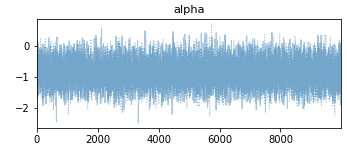



In [ ]:
# ========================================== Diagnostics ================================================= #

with SFM:

  traceplot = az.plot_trace(trace, var_names=["alpha"], compact=True)
  

<br>

Let's inspect the posterior distribiution of our main parameter of interest -- the (estimated) skill/ability ( $\hat{\alpha}_i$ ) of our player of interest -- a bit more closely:


Of course, the loadings on the team statistics ( $\hat{\beta}$ ) might not be any less interesting!

In [ ]:
# ========================================== Diagnostics: Plot Posterior ================================================= #

with SFM:

  az.plot_posterior(trace, var_names=["alpha"])

<br>


So far so good. But now let's do what we are here for and answer our main research question:

<br>


<center><font color='gold' size=4.5>" What is the probability of a player scoring, based only on his Skill/Ability? "</font></center>

<br>

Said differently, what is a player's probability of scoring if all teams were equally strong (or weak)?

<br>

Here we'll go on a liitle detour. Note that instead of using the $\mathtt{sigmoid}$ function, we can rewrite Equation $\left( 1 \right)$ in form of the log-odds-ratio:

<br>

\begin{align}
     log\left(\frac{\hat{p}_{i}}{1-\hat{p}_{i}}\right) = \hat{\alpha}_i + \mathbf{X}_{i} \, \mathbf{\hat{\beta}}
\end{align}

where the little hat above our parameters $\left( \hat{} \right)$ just indicates that these are *estimates* of the *true parameters* that we draw from the joint-posterior distribution (`trace.posterior`).

<br>

We now conduct the following steps to answer our research-question stated above:

> 1. By assuming that *all teams are equally strong*, we set all our "factors" ($\mathbf{X}_{i}$) to 0, such that our model reduces to:

$$log\left(\frac{\hat{p}_{i}}{1-\hat{p}_{i}}\right) = \hat{\alpha}_{i}$$

> 2. Then, we get the probability $\hat{p}_{i}$ by rearranging:

$$\hat{p}_{i} = \frac{e^{\hat{\alpha}_{i}}}{1+e^{\hat{\alpha}_{i}}}$$


> 3. Which value to choose for $\hat{\alpha}_{i}$? The *mean* or the *median*? 
I mostly go with the *median*, but feel free to play around.

<br>

Let's get our estimate for $\hat{\alpha}_i$ :

In [ ]:
# --- Let's choose the mean
alpha_mean = np.mean(trace.posterior["alpha"].values)
print("Mean Skill (\u03B1\u1d62): ", np.round(alpha_mean, 2))

# --- Or the median
alpha_median = np.median(trace.posterior["alpha"].values)
print("Median Skill (\u03B1\u1d62): ", np.round(alpha_median, 2))

Mean Skill (αᵢ):  -0.77
Median Skill (αᵢ):  -0.77


<br>

Let's transform it into probability $\hat{p}_i$ :

In [ ]:
# ---- Probability of Scoring, conditioning on Skill/Ability only:
alpha_post = alpha_median
prob = np.exp(alpha_post)/(1+np.exp(alpha_post))

print("Probability of Scoring (only based on Skill): ", np.round( prob ,2))

Probability of Scoring (only based on Skill):  0.32


<br>


**Let's define the Uncertainty around our Point Prediction**

That is, define the boundaries $\left[\hat{p}^{low}_{i},\hat{p}^{up}_{i}\right]$ of the interval, within which our point-estimate $\hat{p}_{i}$ ranges with `cred_region` % of certainty.

In [ ]:
# ---- Let's define the Uncertainity:
cred_region = 0.95

# --- --- Get the "alpha" avlue at the lower- and upper-bounds
alpha_post_up = np.quantile(trace.posterior["alpha"].values, q=1-(1-cred_region)/2)
alpha_post_low = np.quantile(trace.posterior["alpha"].values, q=(1-cred_region)/2)

# --- --- Convert to Probabilities
prob_up = np.exp(alpha_post_up)/(1+np.exp(alpha_post_up))
prob_low = np.exp(alpha_post_low)/(1+np.exp(alpha_post_low))

print("Credible Region: ", cred_region * 100,"% \n")
print("Probability of Scoring (only based on Skill) -- Lower Bound: ", np.round( prob_low ,2))
print("Probability of Scoring (only based on Skill) -- Upper Bound: ", np.round( prob_up ,2))

Credible Region:  95.0 % 

Probability of Scoring (only based on Skill) -- Lower Bound:  0.25
Probability of Scoring (only based on Skill) -- Upper Bound:  0.39


<br>

Well ... interesting ...

...<font size="4">**but is our model actually any good, or just producing complete crap?**</font>

That is, let's have a look at what our model tells us about the probability of player $i$ scoring a goal ($\hat{Y}_i$), and how well these *in-sample* predictions match the observed occurrences ($Y_i$).

<br><br>

In order to get $\hat{Y}$, we'll draw samples from the **Posterior Predictive Distribution**.  
That is, we compute a Bernoulli distribution based on samples of our posterior estimates for the probability of player $i$ scoring ($\hat{p}_i$), which we extract from `trace.posterior["p_score"]`. 
What we get in return is a **binary** vector $\hat{Y}$ made up of $0$ and $1$.

<br><br>

Then we can evaluate how well our model's predictions for a player scoring ($\hat{Y}_i = 1$) or not ($\hat{Y}_i = 0$) match our empricially observed data ($Y_i$). Some of the frequently used *evaluation metrics* to do that are:

> - Mean-Squared Error (MSE): &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; the classical metric for regression-models;
> - Log-Probability Loss (Log-Prob): &emsp;&emsp;&emsp; since we're dealing with a classification exercise;
> - Area Under the Curve (AUC): &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; maybe the most common metric for classification exercises;

<br>

I feel most comfortable to judge the model by looking at the AUC (often also called AUROC (Area Under the Receiver-Operating-Cost Curve)). The AUC tells us pretty neatly, whether our model actually adds some value to predict player $i$'s probability to score in the upcoming match.

> $AUC_i = 0.5$: &ensp;&ensp; we can be pretty confident that our model is no good and we could have just tossed a coin instead. 

> $AUC_i = 1$: &ensp;&ensp;&ensp;&emsp; we've pretty much nailed it! Not only does our model accurately predict whether <br> &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; player $i$ scores in the upcoming match or not, but we have also done an awesome job in specifying our model <br> &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; (read: which team-factors to include and which not) !

<br>

<font color='darkred'>**DISCLAIMER**</font>: &emsp; When I say "*accurately predict*", beware that this is en entirely *in-sample* (explanatory) analysis. The model may <br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; potentially radically overfit, and then produce complete non-sense in an out-of-sample exercise, i.e. on data it has not yet seen.

<br>

While this is a big concern, making out-of-sample predictions is not what this whole exercise had been intended to produce. 
That's why I'll save the testing of the model's out-of-sample performance for the future...


<br><br>

Enough rambling, let's move on to the evaluation...

In [ ]:
# =================================== Posterior Predictive Checks =================================== #

with SFM:

  # --- Sample Data from the prosterior and plot it
  ppc = pm.sample_posterior_predictive(trace,random_seed=RANDOM_SEED)
  

In [ ]:
# --- Get predictive samples:
pred_samples = ppc.posterior_predictive.data_vars["likelihood"].values
pred_samples = trace.posterior["p_score"].values

# --- Mean
mean = np.mean(pred_samples, axis=(0,1)).flatten()

print("Player: " + my_player_single)
print("\n")
print("RMSE:     " , np.round(np.sum((Y_train-mean)**2)/len(Y_train),4))
print("Log-Prob: " , np.round(-sum((1-Y_train) * np.log(np.maximum(1-mean,1e-5)) + Y_train * np.log(np.maximum(mean,1e-5))) / len(mean),4))
print("AUC:      ", np.round(roc_auc_score(y_true=Y_train,y_score=mean),4))


Player: cristiano ronaldo


RMSE:      0.1935
Log-Prob:  0.5729
AUC:       0.71


<br><br>
Hopefully we got an $AUC$ north of at least  $0.65$ -- or even better  $0.70$ (let's not shoot for the moon and hope to get something like $0.85$). Otherwise we should probably think about adjusting our model in terms of which "factors" to in- and exclude.


<br>

In case you want to do some model selection, have a look at the following metrics. With `scale='deviance'`, the model that achieves a lower score is to be preferred! <br>
(For more information see [this #PyMC3 example](https://docs.pymc.io/en/v3/pymc-examples/examples/diagnostics_and_criticism/model_comparison.html)).

In [ ]:
# --- --- Leave-One-Out-Cross-Validation (LOO)
SFM_single_loo = az.loo(trace, SFM,scale='deviance')
print("LOO:  ", str(np.round(SFM_single_loo.loo,3)))

# --- --- Widely-applicable Information Criterion (WAIC)
SFM_single_waic = az.waic(trace, SFM,scale='deviance')
print("WAIC: ", str(np.round(SFM_single_waic.waic,3)))

<br>

**Final Exercise: Time-Series Plot!**

Let's look at the player's probability of scoring -- based on the full model -- over time. The shaded areas are the matches in which the player has scored a goal.

<Figure size 2160x1080 with 0 Axes>

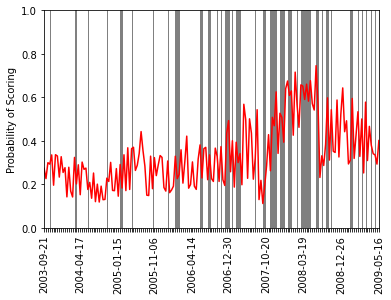

In [ ]:
# ======================== Let's look at the Time-Series of our estimated probabilities (where: P(Y=1|alpha + X' beta)) =================== #

timesteps = data_single.kickoff_dt

# --- Pick 10 labels for the x-axis
x_label = np.repeat('',len(timesteps)).astype('<U10')
for ll in np.linspace(0,len(x_label)-1,10, dtype=int):
  x_label[ll] = timesteps[ll][0:10]


# --- Initialize the plot
plt.figure(figsize=(30,15))
fig, ax = plt.subplots()

# --- Shade the Matches with Goals
ax.fill_between(data_single.kickoff_dt, 0,1, 
                    where=data_single['goal'], 
                    transform=ax.get_xaxis_transform(),
                    color='gray')

# --- Plot the mean
plt.plot(timesteps,mean,color='red',label='Mean Scoring Probability')


# ---- Some cosmetics
plt.xlim([timesteps[0],timesteps[len(timesteps)-1]])
plt.ylim([0,1])
plt.ylabel('Probability of Scoring')
ax.set_xticklabels(x_label)
ax.tick_params(axis='x',rotation=90)

# ---- Show the plot
plt.show()

<br>
<br>
<br>

# <font size="6.5" color="red">**Multiple Players**</font>

<br>

*Question*: &emsp;&emsp; Why look at multiple players?

*Answer*: &emsp;&emsp;&emsp;&emsp; We will *pool* the observations of several players, which will give us *more* training-data, <br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; which in turn shall improve the precision of our parameter estimates.

<br>

The following cell allows you to specify

> - `my_vars`: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; The list of features $\mathbf{X}$ . You can -- in theory -- choose any variable from `data.columns`.
> - `I_want_stand`: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; The option to standardize the data.

In [ ]:
# ================================== USER INTERACTION ============================== #

# --- Define your explanatory variables [column names of 'data']:
my_vars = ['goalsscored_rank_team','goalsscored_rank_team_wo_player','home_pitch',
           'goalsconceded_rank_opp','points_diff','goal_balance_diff']

# --- Do you want to standardize your data?
I_want_stand = True

# ================================== USER INTERACTION ============================== #

In [ ]:
# ================================== Define your Y and X ============================== #

# --- Get your X and Y
X_train = np.array(data[my_vars]).astype(float)
Y_train = np.array(data['goal'])


# --- Before moving on: do you want to standardize the features?
if I_want_stand == True:
  
  X_train_true = X_train.copy()

  # --- --- Mean & SD of 'data'
  X_mean = np.mean(X_train_true, axis=0)
  X_sd = np.std(X_train_true, axis=0)

  # ---- --- Standardize 'data'
  X_train = (X_train_true - X_mean) / X_sd

<font size='4'>**How does our model in Equation $\left( 1 \right)$ change?**</font> 

<br>

With multiple players in our training set, i.e. with a dataset that is a pooled cross-section of indviduals, we have a few more modeling options available to us.
The intention is of course that these choices will give us more precise estimates of our paramters (i.e. reduce sharpen the posterior distribution of our parameters). 

<br>

Given an altered data-structure compared to the <font color="green">single-player</font> model, I will incorporate the following assumptions into the <font color="red">multiple-player</font> model:

> <font color='yellow'>Assumption 1</font>: &emsp; If the goal-scoring probability of player $i$ shows a different sensitivity to the *factors* than player $j$ does, then this <br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; should be a sign of *adaptivity* of a given player. This should then not be reflected in $\beta_i$, but in our skill/ability <br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; parameter $\alpha_i$. Hence, there won't be any player-specific *factor*-loadings, $\beta_i \;$! <br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Our  $\beta$-vector of *factor*-loadings will be *common* across all players!

<br>

> <font color='yellow'>Assumption 2</font>: &emsp; What if our players got better (or worse) over time (i.e. let's allow for "seasonal" skill) ?!

<br>

Thus, we have:

- **individual** skill-/ability-coefficient, that **varies by season**: $\alpha_{i,s}$

- **common** loadings on team-statistics: $\beta$

<br> 
<br> 

**Model**: 


\begin{align}
     p_{i,s} \equiv   P\left(Y_{i,s} = 1 | \mathbf{X}_{i,s}, \alpha_{i,s}, \beta \right) = \sigma \left(\alpha_{i,s} + \mathbf{X}_{i,s} \, \mathbf{\beta} \right) \qquad \left( 2 \right )
\end{align} 

<br>

<font color="darkred">**NOTE**</font>: &emsp; Since our skill/ability parameter ($\alpha_{i,s,}$) now carries a subscript $s$, I have also attached it <br> &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&emsp; to our observed outcome variable ($Y_{i,s}$), and our *factors* ($\mathbf{X}_{i,s}$) .

In [ ]:
# ========================================== Define the Model ================================================= #

# --- Create a 'player_season' indicator
data['player_season'] = data['name_player'] + [' '] + data['season']

# --- Get your Players' indices --> Now differentiated by Season!
player_idxs, players = pd.factorize(data.player_season)

coords = {"players": players, "obs_id":np.arange(len(player_idxs))}

with pm.Model(coords=coords) as SFM_multi:


  # --- We want independent Skill-/Ability-Parameters
  player_idx = pm.Data("player_idx",player_idxs, dims="obs_id")


  # --- Set your priors:

  # --- "\alpha", i.e. the parameter that will give us the Player's ability
  alpha = pm.Normal("alpha",mu=0,sigma=1, dims="players")

  # --- "\beta(s)": the features are designed such that higher/more positive values, 
  #     should INCREASE the likelihood of the player scoring ---> i.e. this "decreases" 'alpha'
  #     ---> model "\beta(s)" to be positive numbers
  #     ---> But let's be agnostic: let's impose a Normal, as well
  beta = pm.Normal("beta",mu=0,sigma=1,shape=len(my_vars))

  # --- Probability of Scoring:
  p_score = pm.Deterministic('p_score', pm.math.sigmoid(alpha[player_idx] + pm.math.dot(X_train, beta)))  

  # --- Fit the Data:
  likelihood = pm.Bernoulli("likelihood", p_score, observed=Y_train, dims="obs_id")


In [ ]:
# --- What does our model look like?
pm.model_to_graphviz(SFM_multi)

In [ ]:
# ========================================== Click the Inference Button ================================================= #

with SFM_multi:

  trace_multi = pm.sample(10000, return_inferencedata=True, tune=10000)

<br>

How did our sampling go? Do the traces look reasonable? 

<br>

**Some Diagnostics of our Sampling**

The `traceplot` should look similar to the one for a single player. Only that we will now see a trace for each of our $\alpha_{i,s}$. 
When running the following cell, the picture on the right-hand-side should therefore look something like the following -- depending on how many players you have previously specified:

<br>

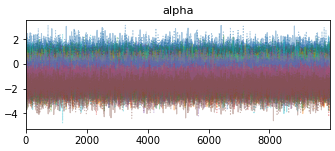



In [ ]:
# ========================================== Diagnostics ================================================= #

with SFM_multi:

  traceplot = az.plot_trace(trace_multi, var_names=["alpha"], compact=True)

<br>

The picture on the left-hand-side already gives us a first impression of our main parameter of interest: the individual skill/ability of player $i$ in season $s$:  $\hat{\alpha}_{i,s}$ .

<br>

But what a mess(i)! You can't see anything. Let's disentangle all these curves! And [#PyMC](https://www.pymc.io/welcome.html) offers a simple and neat way to do that!

<br>

[Of course, the loadings on the team statistics ( $\hat{\beta}$ ) might not be any less interesting!]

In [ ]:
# ========================================== Diagnostics: Plot Posterior ================================================= #

with SFM_multi:

  az.plot_posterior(trace_multi, var_names=["alpha"])

<br>

Let's use an alterantive visualization technique that allows us to easily compare the posteriors of each of our $\alpha_{i,s}$ in a single chart ! ... Yeah, with many players it looks aweful ... but we already get a really nice overview of how the palyers' skill/ability compares to one another!

In [ ]:
# ================================== Diagnostics: Plot Posterior -- Alternative Layout ====================================== #

with SFM_multi:

  az.plot_forest(trace_multi, var_names=["alpha"], combined=True)

<br>


Looks all quite pretty -- hopefully ... but now let's do what we are here for and answer our main research question:

<br>


<center><font color='gold' size=4.5>" What is the probability of a player scoring, based only on his Skill/Ability? "</font></center>

<br>

Said differently, what is a player's probability of scoring if all teams were equally strong (or weak)?

<br>

Here we'll go on a little detour. Note that instead of using the $\mathtt{sigmoid}$ function, we can rewrite Equation $\left( 2 \right)$ in form of the log-odds-ratio:

<br>

\begin{align}
     log\left(\frac{\hat{p}_{i,s}}{1-\hat{p}_{i,s}}\right) = \hat{\alpha}_{i,s} + \mathbf{X}_{i,s} \, \mathbf{\hat{\beta}}
\end{align}

where the little hat above our parameters $\left( \hat{} \right)$ means that these are *estimates* that we draw from the joint-posterior distribution (`trace.posterior`).

<br>

As in the case where our object of interest was just a *single* player, we run through the following steps to answer our research-question:

> 1. By assuming that *all teams are equally strong*, we set all our "factors" ($\mathbf{X}_{i,s}$) to 0, such that our model reduces to:

$$log\left(\frac{\hat{p}_{i,s}}{1-\hat{p}_{i,s}}\right) = \hat{\alpha}_{i,s}$$

> 2. Then, we get the probability $\hat{p}_{i,s}$ by rearranging:

$$\hat{p}_{i,s} = \frac{e^{\hat{\alpha}_{i,s}}}{1+e^{\hat{\alpha}_{i,s}}}$$


> 3. Which value to choose for $\hat{\alpha}_{i,s}$? The *mean* or the *median*? 
I mostly go with the *median*, but feel free to play around.

In [ ]:
# --- Each Player's Metric:
for pp in range(len(players)):

  # --- Let's choose the mean
  alpha_mean = np.mean(trace_multi.posterior["alpha"][:,:,pp].values)
  print("Mean Skill ---",players[pp],": ", np.round(alpha_mean, 2))

  # --- Or the median
  alpha_median = np.median(trace_multi.posterior["alpha"][:,:,pp].values)
  print("Median Skill ---",players[pp],": ", np.round(alpha_median, 2))


  # ---- Probability of Scoring, conditioning on Skill/Ability only:
  alpha_post = alpha_median
  prob = np.exp(alpha_post)/(1+np.exp(alpha_post))

  print("Probability of Scoring (only based on Skill) ---",players[pp],": ", np.round( prob ,2))

<br>

**Let's define the Uncertainty around our Point Prediction**

That is, define the boundaries $\left[\hat{p}^{low}_{i,s},\hat{p}^{up}_{i,s}\right]$ of the range, within which our point-estimate $\hat{p}_{i,s}$ ranges with `cred_region` % of certainty.

In [ ]:
# ---- Let's define the Uncertainity & collect the Skill across all seasons for each player:
cred_region = 0.95


# --- We will also store the probabilities for each player 'by season' and 'across seasons'. This will come in handy quite shortly ...
Player_Skill_season = {key: [] for key in players}
Player_Skill = {key: [] for key in np.unique(data['name_player'])}

print("Credible Region: ", cred_region * 100,"% \n")
for pp in range(len(players)):

  # --- --- Get the "alpha" value at the lower- and upper-bounds
  alpha_post_up = np.quantile(trace_multi.posterior["alpha"][:,:,pp].values, q=1-(1-cred_region)/2)
  alpha_post_median = np.quantile(trace_multi.posterior["alpha"][:,:,pp].values, q=0.5)
  alpha_post_low = np.quantile(trace_multi.posterior["alpha"][:,:,pp].values, q=(1-cred_region)/2)

  # --- --- Convert to Probabilities
  prob_up = np.exp(alpha_post_up)/(1+np.exp(alpha_post_up))
  prob_median = np.exp(alpha_post_median)/(1+np.exp(alpha_post_median))
  prob_low = np.exp(alpha_post_low)/(1+np.exp(alpha_post_low))

  print("Probability of Scoring (only based on Skill) -- Lower Bound ---",players[pp],": ", np.round( prob_low ,2))
  print("Probability of Scoring (only based on Skill) --    Median   ---",players[pp],": ", np.round( prob_median ,2))
  print("Probability of Scoring (only based on Skill) -- Upper Bound ---",players[pp],": ", np.round( prob_up ,2))
  print("\n")

  # --- --- Store the median probabilities by season
  Player_Skill_season[players[pp]] = prob_median

  # --- --- Store the median probabilities across seasons
  pp_name = players[pp][0:(len(players[pp])-8)]
  Player_Skill[pp_name].append(prob_median)




Again a whole load of numbers to digest! They contain a lot of interesting information though:

They tell us for each player $i$ ...
> - ... the *median* probability ( $\bar{p}_{i,s}$ ) of scoring in each match in season $s$ based only on his skill and ability;
> - ... the lower and upper bounds of the range that $p_{i,s}$ falls in, with `cred_region` certainty

<br>

That's cool!
But maybe we can do something even more insightful that helps us understand the effect of player $i$'s team on his probability of scoring!


<br><br>
Therefore, let's have alook at the **excess-skill-metric** $S_{i,s}$. It compares each player's probability of scoring ($\hat{p}_{i,s}$) when accounting for both his ability and his team's strength ($\hat{\alpha}_{i,s} + \mathbf{X}_{i,s} \, \hat{\beta}$) to the probability of him scoring when only accounting for his own skill/ability ($\hat{\alpha}_{i,s}$):

 $$ S_{i,s} = \frac{\frac{e^{\hat{\alpha}_{i,s}}}{1 \; + \; e^{\hat{\alpha}_{i,s}}}}{\frac{e^{\hat{\alpha}_{i,s} + \mathbf{X}_{i,s} \, \hat{\beta}}}{1 \; + \; e^{\hat{\alpha}_{i,s} + \mathbf{X}_{i,s} \, \hat{\beta}}}} \quad ,$$

where $S_{i,s} > 1$ tells us that -- according to the model -- the player's scoring probability was dragged down by his team's performance. Said differently, player $i$'s full potential did not come through while playing for that particular team in season $s$.


<br>

Since we already have stored the estimates for the numerator in `Player_Skill_season`, the only thing that is left to compute $S_{i,s}$ is the denominator.

To estimate the full model ( $\hat{\alpha}_{i,s} + \mathbf{X}_{i,s} \, \hat{\beta}$ ), we could again draw all our parameter-samples from the posterior via `trace_multi.posterior` and simulate some predictions ($\hat{p}_{i,s}$) using our observed factors $\mathbf{X}_{i,s}$. But that sounds like a lot of manual work ...

<br>

... **but with [#PyMC](https://www.pymc.io/welcome.html) it's pretty easy!** The `trace_multi.posterior["p_score"]` array has already got everything what we are looking for, namely the denominator in $S_{i,s}$.

<br>

Awesome! Let's compute our $S_{i,s}$ statistic as described above:

In [ ]:
# --- Let's get the model's predictions, i.e. each player's probability of scoring based on the model

# --- As above, we will store the probabilities for each player 'by season' and 'across seasons'
Player_ProbScore_season = {key: [] for key in players}
Player_ProbScore = {key: [] for key in np.unique(data['name_player'])}


for pp in range(len(my_player)):

  # --- Get the range in the "likelihood-database" that gives you the predictions for player "i" in season "s"
  # --- --- Extract the seasons that the player has played
  season_s = pd.unique(MY_PLAYER[my_player[pp]].season)

  if pp == 0:
    range_prev = 0
  else:
    range_prev = np.sum([MY_PLAYER[my_player[prev]].shape[0] for prev in range(pp)])


  for ss in range(len(season_s)):

    index_ss = MY_PLAYER[my_player[pp]].index[MY_PLAYER[my_player[pp]].season == season_s[ss]]

    # --- Get the range in the "likelihood-database" that gives you the predictions for player "i"
    range_start = range_prev + index_ss[0]
    range_end = range_prev + index_ss[-1]
                                         
    #pred_samples = ppc.posterior_predictive.data_vars["likelihood"][:,:,range(range_start,range_end)].values
    pred_samples = trace_multi.posterior["p_score"][:,:,range(range_start,range_end)].values

    # --- Get the Mean
    mean = np.mean(pred_samples).flatten()

    # --- Get the Median --> can be used instead of the mean
    median = np.median(pred_samples).flatten()

    # --- --- Store the median probabilities by season
    pp_name = my_player[pp] + " " + season_s[ss]
    Player_ProbScore_season[pp_name] = mean

    # --- --- Store the median probabilities across seasons
    Player_ProbScore[my_player[pp]].append(mean)

<br>

So let's plot $S_{i,s}$, i.e. player $i$'s *excess-skill* in season $s$! 

<br>

> Recall: $\,$ if $S_{i,s} > 1$ -- accordng to the model -- the player is *under-valued* compared to his inherent skill/ability, <br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp; i.e. the player actually has **excess skill** but his own team is dragging him down.

In [ ]:
# --- Initialize the plotting-dataframe
plot_df = pd.DataFrame({"players": Player_ProbScore_season.keys()})

# --- Assemble the ability-/skill-statistics that you have alreday calculated previously
plot_df["S"] = [(Player_Skill_season[pp] / Player_ProbScore_season[pp])[0] for pp in plot_df["players"]]

# --- Sort the dataframe descendingly according to 'S'
plot_df = plot_df.sort_values(by="S", ascending=False, ignore_index=1)

# --- Start plotting!
fig,ax = plt.subplots()
ax.barh(np.arange(plot_df.shape[0]), plot_df["S"].values)
ax.axvline(x=1,color='black',lw=2)
ax.set_yticks(np.arange(plot_df.shape[0]))
ax.set_yticklabels(list(plot_df["players"]))
ax.invert_yaxis()
ax.set_title("Has a Player been Undervalued? \n $S_{i,s} > 1$")
ax.set_xlabel("Excess-Skill ($S_{i,s}$)")

# --- --- Attach the 'S' metric:
for i, _ in enumerate(plot_df['S']):
    ax.text(plot_df.loc[i,'S'] + .005, i + .25, str(np.round(plot_df.loc[i,'S'],2)), color='red')

<br>

Again, with a lot of players in our sample, this looks mess(i/y) ...

Let's look at a certain subgroup, e.g. the top (bottom) 10.


In [ ]:
# --- To get the Top 10, run this cell
sub_plot_df = plot_df.head(10)

In [ ]:
# --- To get the Bottom 10, run this cell
sub_plot_df = plot_df.tail(10).reset_index(drop=True)

In [ ]:
# --- Plot the subgroup
fig,ax = plt.subplots()
ax.barh(np.arange(sub_plot_df.shape[0]), sub_plot_df["S"].values)
ax.axvline(x=1,color='black',lw=2)
ax.set_yticks(np.arange(sub_plot_df.shape[0]))
ax.set_yticklabels(list(sub_plot_df["players"]))
ax.invert_yaxis()
ax.set_title("Has a Player been Undervalued? \n $S_{i,s} > 1$")
ax.set_xlabel("Excess-Skill ($S_{i,s}$)")

# --- --- Attach the 'S' metric:
for i, _ in enumerate(sub_plot_df['S']):
    ax.text(sub_plot_df.loc[i,'S'] + .005, i + .25, str(np.round(sub_plot_df.loc[i,'S'],2)), color='red')

<br> 

But it could also be interesting to look **across seasons**! <br>
Let's just apply a summary metric (naturally the *mean* or *median*) on $S_{i,s}$ (where $S_{i,s}$ itself is either the *mean* or *median* of samples from the posterior distribution) across $s$, and get $S_{i}$, i.e. player $i$'s *excess-skill* across all seasons $s$.

In [ ]:
# --- Set up the data frame for plotting
plot_df = pd.DataFrame({"players": Player_ProbScore.keys()})
# --- Calculate "S": use either 'mean' or 'median'
plot_df["S"] = [np.median(Player_Skill[pp]) / np.median(Player_ProbScore[pp]) for pp in plot_df["players"]]
# --- Sort the dataframe descendingly according to 'S'
plot_df = plot_df.sort_values(by="S", ascending=False, ignore_index=1)


# --- Plot the results
fig,ax = plt.subplots()
ax.barh(np.arange(plot_df.shape[0]), plot_df["S"].values)
ax.axvline(x=1,color='black',lw=2)
ax.set_yticks(np.arange(plot_df.shape[0]))
ax.set_yticklabels(list(plot_df["players"]))
ax.invert_yaxis()
ax.set_title("Has a Player been Undervalued? \n $S_{i} > 1$")
ax.set_xlabel("Excess-Skill ($S_{i,s}$)")

# --- --- Attach the 'S' metric:
for i, _ in enumerate(plot_df['S']):
    ax.text(plot_df.loc[i,'S'] + .005, i + .25, str(np.round(plot_df.loc[i,'S'],2)), color='red')

<br>


To recap again: the purpose of $S_{i}$ or $S_{i,s}$ is to evaluate how a  player's probability of scoring only based on his skill/ability, $\; P\left(Y_{i,s} | \hat{\alpha}_i \right) \;$, compares to the probability of him scoring when we also accounting for his team's strength, $\; P\left(Y_{i,s} | \mathbf{X}_{i,s}\, , \hat{\alpha}_i \, , \hat{\beta} \right) \;$. <br>
Keep in mind that we have built these metrics based on the posterior distribution's *median* (or the *mean*) -- hence, a single point-estimate only. We haven't said anything about the uncertainty around that single number. 

But enough for now. Let's go with the academic jargon and say: "Specifying some credible interval around our point-estimate for $S_{i}$ or $S_{i,s}$ is *left for future research*".


<br><br>

On to the last part! As in the single-player example we should ask ourselves ... 

... <font size="4">**is our model actually any good, or just producing complete crap?**</font>

That is, let's have a look at what our model tells us about the probability of player $i$ scoring a goal ($\hat{Y}_{i,s}$), and how well these *in-sample* predictions match the observed occurrences ($Y_{i,s}$).

<br><br>

In the following I'll get rid of the subscript $s$ by calculating the metrics for each player $i$ across all seasons $s$, such that $\hat{Y}_{i}$ and $Y_{i}$ are column-vectors of length $L_i = \sum^S_{s=1} M_{i,s} \,$, where $M_{i,s}$ is the total number of matches played by player $i$ in season $s$.

In order to get $\hat{Y}$, we'll draw samples from the **Posterior Predictive Distribution**.  
That is, we compute a Bernoulli distribution based on samples of our posterior estimates for the probability of player $i$ scoring ($\hat{p}_i$), which we extract from `trace_multi.posterior["p_score"]`. 
What we get in return is a **binary** vector $\hat{Y}$ made up of $0$ and $1$.

<br><br>

Then we can evaluate how well our model's predictions for a player scoring ($\hat{Y}_i = 1$) or not ($\hat{Y}_i = 0$) match our empricially observed data ($Y_i$). Some of the frequently used *evaluation metrics* to do that are:

> - Mean-Squared Error (MSE): &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; the classical metric for regression-models;
> - Log-Probability Loss (Log-Prob): &emsp;&emsp;&emsp; since we're dealing with a classification exercise;
> - Area Under the Curve (AUC): &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; maybe the most common metric for classification exercises;

<br>

I feel most comfortable with judging the model by looking at the AUC (often also called AUROC (Area Under the Receiver-Operating-Cost Curve)). The AUC tells us pretty neatly, whether our model actually adds some value to predict player $i$'s probability to score in the upcoming match.

> $AUC_i = 0.5$: &ensp;&ensp; we can be pretty confident that our model is no good and we could have just tossed a coin instead. 

> $AUC_i = 1$: &ensp;&ensp;&ensp;&emsp; we've pretty much nailed it! Not only does our model accurately predict whether <br> &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; player $i$ scores in the upcoming match or not, but we have also done an awesome job in specifying our model <br> &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; (read: which team-factors to include and which not) !

<br>

<font color='darkred'>**DISCLAIMER**</font>: &emsp; Again, when I say "*accurately predict*", beware that this is en entirely *in-sample* (explanatory) analysis. The model may <br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; potentially radically overfit, and then produce complete non-sense in an out-of-sample exercise, i.e. on data it has not yet seen. 

<br>

While *overfitting* is a big concern, making out-of-sample predictions is not what this whole exercise had been intended to produce. 
That's why I'll save the testing of the model's out-of-sample performance for the future...


<br><br>

Enough rambling, let's move on to the evaluation...

In [ ]:
# =================================== Posterior Predictive Checks =================================== #

with SFM_multi:

  # --- Sample Data from the prosterior and plot it
  ppc = pm.sample_posterior_predictive(trace_multi,random_seed=RANDOM_SEED)

<br>

**Check Evaluation Metrics across all Players**

In [ ]:
# --- Overall Evaluation Metrics: RMSE, Log-Prob, AUC-Score

pred_samples = ppc.posterior_predictive.data_vars["likelihood"].values
pred_samples = trace_multi.posterior["p_score"].values

# --- Get the mean
mean = np.mean(pred_samples, axis=(0,1)).flatten()

print("RMSE --- All Players:     ", np.round(np.sum((Y_train-mean)**2)/len(Y_train),4))
print("Log-Prob --- All Players: ", np.round(-sum((1-Y_train) * np.log(np.maximum(1-mean,1e-5)) + 
                                                Y_train * np.log(np.maximum(mean,1e-5))) / len(mean),4))
print("AUC --- All Players:      ", np.round(roc_auc_score(y_true=Y_train,y_score=mean),4))


RMSE --- All Players:      0.1965
Log-Prob --- All Players:  0.5778
AUC --- All Players:       0.7066


<br>


Lastly, let's look at each player individually, but across all seasons ...


**Check Evaluation Metrics by Player**

In [ ]:
# --- Evaluation Metrics: RMSE, Log-Prob, AUC-Score

# --- --- Pre-define some variables for counting
range_start = 0

for pp in range(len(my_player)):

  # --- Get the range in the "likelihood-database" that gives you the predictions for player "i"
  range_end = range_start + MY_PLAYER[my_player[pp]].shape[0]

  pred_samples = ppc.posterior_predictive.data_vars["likelihood"][:,:,range(range_start,range_end)].values

  # --- Get the Mean
  mean = np.mean(pred_samples, axis=(0,1)).flatten()

  # --- Extract Player pp's 'labels', i.e. observed outcomes:
  Y_train_pp = np.array(MY_PLAYER[my_player[pp]].goal).flatten()



  print("RMSE ---",my_player[pp],":     ", np.round(np.sum((Y_train_pp-mean)**2)/len(Y_train_pp),4))
  print("Log-Prob ---",my_player[pp],": ", np.round(-sum((1-Y_train_pp) * np.log(np.maximum(1-mean,1e-5)) + 
                                                 Y_train_pp * np.log(np.maximum(mean,1e-5))) / len(mean),4))
  print("AUC ---",my_player[pp],":      ", np.round(roc_auc_score(y_true=Y_train_pp,y_score=mean),4))
  print("\n")

  # --- The end of the current player's range is the beginning of the next player's range:
  #     As the German saying goes: "After the game, is before the game!" -- Sepp Herberger (Coach of the first German National Team to win the World Cup (1954))
  range_start = range_end


RMSE --- cristiano ronaldo :      0.1878
Log-Prob --- cristiano ronaldo :  0.5599
AUC --- cristiano ronaldo :       0.7376


RMSE --- alan shearer :      0.2126
Log-Prob --- alan shearer :  0.6134
AUC --- alan shearer :       0.7164


RMSE --- fernando torres :      0.165
Log-Prob --- fernando torres :  0.503
AUC --- fernando torres :       0.7782


RMSE --- didier drogba :      0.19
Log-Prob --- didier drogba :  0.5643
AUC --- didier drogba :       0.7039


RMSE --- zlatan ibrahimovic :      0.2054
Log-Prob --- zlatan ibrahimovic :  0.5873
AUC --- zlatan ibrahimovic :       0.6318


RMSE --- wayne rooney :      0.2039
Log-Prob --- wayne rooney :  0.5973
AUC --- wayne rooney :       0.6379


RMSE --- dimitar berbatov :      0.1997
Log-Prob --- dimitar berbatov :  0.5854
AUC --- dimitar berbatov :       0.6212


RMSE --- michael owen :      0.1921
Log-Prob --- michael owen :  0.566
AUC --- michael owen :       0.7091




<br><br>

As in the *Single-Player*-case, we hopefully got some $AUC_i$ north of at least  $0.65$ -- or even better  $0.70$ (let's not shoot for the moon and hope to get something like $0.85$). If not, let's think again about our model.

<br><br>

# End of the Game -- On to the Post-Game Ramblings!

Well, that was interesting! Though this is just an illustrative example, I'd be grateful for any sort of comments, criticism, and suggestions on how to improve the model. 


Some *avenues for future research* could be along the lines of:

> - *Hierarchical* model extension, by making use of *hyper-priors*;
> - Create additional *factors*;
> - Build a *multinomial* model, which does not try to predict whether a player scores or not, but the *number of goals* he scores;
> - ... 

Hope you enjoyed the journey! Please feel free to reach out at: [https://www.maximiliangoebel.com](https://www.maximiliangoebel.com).